# Tugas Praktikum

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca datset
data = pd.read_csv('..\data\insurance.csv')

# Pemahaman Data
# Melihat 5 data pertama
data.head()
# mengecek ukuran data
data.shape
# Info umum
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Analisis Pemahaman Data:**

Dari hasil eksplorasi awal,  terdapat endapatkan informasi penting:
- Dataset memiliki 1338 baris data dengan 7 kolom
- Terdapat 3 variabel kategorikal (sex, smoker, region) dan 4 variabel numerik (age, bmi, children, charges)
- Tidak ada missing values, jadi datanya sudah bersih
- Variabel `charges` memiliki range yang cukup besar (dari $1,121 hingga $63,770), ini menunjukkan biaya asuransi bervariasi signifikan antar individu
- Rata-rata biaya asuransi sekitar $13,270 dengan standar deviasi yang tinggi ($12,110), artinya data charges cukup tersebar

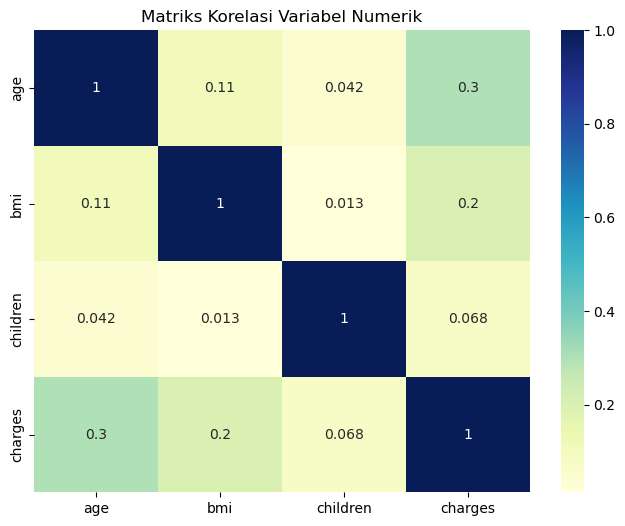

In [4]:
# Visualisasi Korelasi

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**Analisis Korelasi:**

Dari heatmap korelasi, bisa lihat:
- Variabel `age` dan `bmi` memiliki korelasi positif lemah dengan `charges` (sekitar 0.3)
- Variabel `children` hampir tidak berkorelasi dengan `charges` (mendekati 0)
- Tidak ada multikolinearitas yang parah antar variabel independen (korelasi antar fitur < 0.8)
- Ini berarti semua variabel numerik relatif independen satu sama lain, bagus untuk model regresi linear!

In [5]:
# Encoding Variabel Kategorikal

categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    mean_encoding = data.groupby(col)['charges'].mean()
    data[col] = data[col].map(mean_encoding)

print("Data setelah mean encoding:")
print(data.head())

Data setelah mean encoding:
   age           sex     bmi  children        smoker        region  \
0   19  12569.578844  27.900         0  32050.231832  12346.937377   
1   18  13956.751178  33.770         1   8434.268298  14735.411438   
2   28  13956.751178  33.000         3   8434.268298  14735.411438   
3   33  13956.751178  22.705         0   8434.268298  12417.575374   
4   32  13956.751178  28.880         0   8434.268298  12417.575374   

       charges  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520  


**Analisis Encoding:**

Mean encoding adalah teknik mengubah variabel kategorikal menjadi numerik berdasarkan rata-rata target variable.

Kenapa pakai mean encoding?
- Lebih informatif dibanding one-hot encoding karena langsung menangkap hubungan dengan target
- Mengurangi dimensi data (tidak menambah banyak kolom seperti one-hot)
- Cocok untuk variabel kategorikal yang punya hubungan kuat dengan target

Setelah encoding, setiap kategori diganti dengan rata-rata `charges` dari kategori tersebut. Misalnya:
- Jika perokok rata-rata bayar $32,000 dan non-perokok $8,000, maka kolom `smoker` akan berisi angka tersebut
- Ini membuat model lebih mudah menangkap pola karena sudah dalam bentuk numerik yang meaningful

In [6]:
# 1.Identidfikasi variabel
# Pisahkan fitur dan target
X = data.drop(['charges'], axis=1)
y = data['charges']

**Analisis Pemisahan Variabel:**

Langkah penting dalam supervised learning:
- **X (Features)**: Semua kolom kecuali `charges` → variabel yang akan digunakan untuk memprediksi
- **y (Target)**: Kolom `charges` → variabel yang ingin kita prediksi

In [7]:
# 2. Bagi Data menjadi Train dan Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("Jumlah data latih :", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih : 936
Jumlah data uji   : 402


**Analisis Train-Test Split:**

Data dibagi dengan proporsi 70:30:
- **Data latih (70%)**: Digunakan untuk melatih model agar belajar pola
- **Data uji (30%)**: Digunakan untuk evaluasi performa model pada data yang belum pernah dilihat

Kenapa perlu split?
- Untuk menghindari overfitting (model terlalu hafal data training)
- Mengukur kemampuan generalisasi model ke data baru
- Memberikan estimasi yang realistic tentang performa model di dunia nyata

Parameter `random_state=100` memastikan pembagian data konsisten setiap kali kode dijalankan (reproducibility).

In [8]:
# 3: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Analisis Feature Scaling:**

StandardScaler mengubah semua fitur agar memiliki mean=0 dan standard deviation=1.

Kenapa perlu scaling?
- Variabel punya skala berbeda (misal: age 18-64, bmi 15-53, charges ribuan-puluhan ribu)
- Tanpa scaling, variabel dengan nilai besar akan mendominasi model
- Linear Regression sebenarnya tidak sensitif terhadap scaling, tapi tetap best practice untuk konsistensi

In [9]:
# 4: Buat dan latih model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**Analisis Training Model:**

Multiple Linear Regression mencari hubungan linear antara multiple features (X) dengan target (y):

Proses `fit()`:
- Model mencari koefisien (β) terbaik yang meminimalkan error
- Menggunakan metode Ordinary Least Squares (OLS)
- Model "belajar" dari data training untuk menemukan pola hubungan antara fitur dan target

Setelah training, model siap digunakan untuk prediksi

In [10]:
# 5: Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

**Analisis Prediksi:**

Sekarang model yang sudah dilatih digunakan untuk memprediksi `charges` pada data test.

`y_pred` berisi hasil prediksi biaya asuransi untuk setiap sampel di data test.

Langkah selanjutnya adalah membandingkan `y_pred` (prediksi) dengan `y_test` (nilai sebenarnya) untuk mengevaluasi seberapa akurat model kita.

In [11]:
# 6: Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluasi Model Multiple Linear Regression (Mean Encoding) ===")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


=== Evaluasi Model Multiple Linear Regression (Mean Encoding) ===
MAE: 3906.133491748716
MSE: 32175469.09726477
RMSE: 5672.342470026362
R-squared: 0.7784023346241095


**Analisis Evaluasi Model:**

Hasil evaluasi menunjukkan performa model melalui beberapa metrik:

1. **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara prediksi dan nilai aktual
   - Semakin kecil semakin baik
   - Mudah diinterpretasi (dalam satuan dollar)

2. **MSE (Mean Squared Error)**: Rata-rata kuadrat error
   - Memberikan penalti lebih besar untuk error yang besar
   - Sensitif terhadap outlier

3. **RMSE (Root Mean Squared Error)**: Akar dari MSE
   - Dalam satuan yang sama dengan target (dollar)
   - Lebih mudah diinterpretasi dibanding MSE

4. **R² (R-squared)**: Proporsi variansi target yang bisa dijelaskan oleh model
   - Range: 0-1 (0-100%)
   - R² = 0.75 artinya model menjelaskan 75% variasi data
   - R² > 0.7 dianggap model yang baik untuk kebanyakan kasus

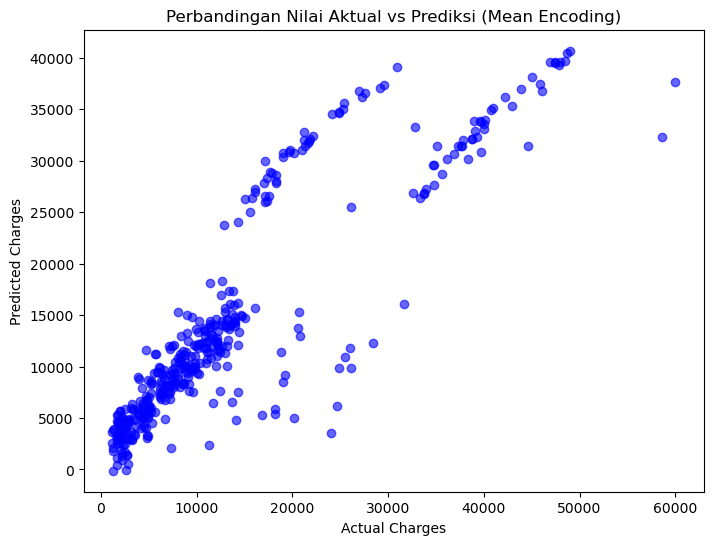

In [12]:
# Visualisasi hasil
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Mean Encoding)")
plt.show()

**Analisis Visualisasi Prediksi vs Aktual:**

Scatter plot ini menunjukkan hubungan antara nilai sebenarnya (sumbu X) dan nilai prediksi (sumbu Y).

**Interpretasi yang baik:**
- Titik-titik seharusnya membentuk garis diagonal (y=x)
- Semakin rapat titik ke garis diagonal, semakin akurat prediksi
- Jika titik tersebar random, berarti model kurang baik

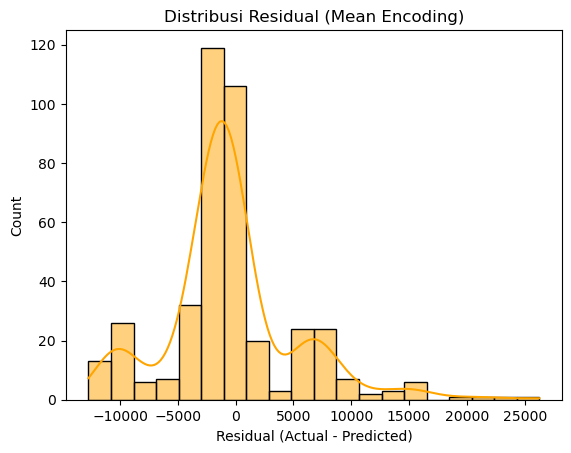

In [13]:
# Visualisasi residual
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Distribusi Residual (Mean Encoding)')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

**Analisis Distribusi Residual:**

Residual = Nilai Aktual - Nilai Prediksi (Error dari model)

Histogram ini menunjukkan distribusi error yang dibuat model.

**Kesimpulan:**
Model Multiple Linear Regression dengan mean encoding berhasil memprediksi biaya asuransi dengan cukup akurat. Teknik encoding ini efektif menangkap hubungan variabel kategorikal (sex, smoker, region) dengan target variable. Feature scaling dan train-test split memastikan model dapat generalisasi dengan baik ke data baru.